In [1]:
# load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#ls

In [3]:
# import the data
df = pd.read_csv('AB_NYC_2019.csv')

In [4]:
# checking the length of the data
len(df)

48895

There are almost 50000 samples. 

In [5]:
# lets print the first five samples of this dataset
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

We see that some of the have spaces and are uppercase letters.

In [6]:
df.columns = df.columns.str.lower().str.replace(' ','_') # converting the fields to lowercase
categorical_cols = df.columns[df.dtypes == 'object'] # extracting the fields that are lowercase
categorical_cols
# Using a for loop to conver the cols to lowercase and replace all the spaces in the categories
for col in categorical_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head()    

id                                              name  host_id  \
0  2539                clean_&_quiet_apt_home_by_the_park     2787   
1  2595                             skylit_midtown_castle     2845   
2  3647               the_village_of_harlem....new_york_!     4632   
3  3831                   cozy_entire_floor_of_brownstone     4869   
4  5022  entire_apt:_spacious_studio/loft_by_central_park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         john            brooklyn    kensington  40.64749  -73.97237   
1     jennifer           manhattan       midtown  40.75362  -73.98377   
2    elisabeth           manhattan        harlem  40.80902  -73.94190   
3  lisaroxanne            brooklyn  clinton_hill  40.68514  -73.95976   
4        laura           manhattan   east_harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     private_room    149               1                  9  2018-10-19   
1  entire_home/apt    225               1                 45  2019-05-21   
2     private_room    150               3                  0         NaN   
3  entire_home/apt     89               1                270  2019-07-05   
4  entire_home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [7]:
# checking for missing values
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can see that the price is has no missing values.

<Axes: xlabel='price', ylabel='Count'>

<Axes: xlabel='price', ylabel='Count'>

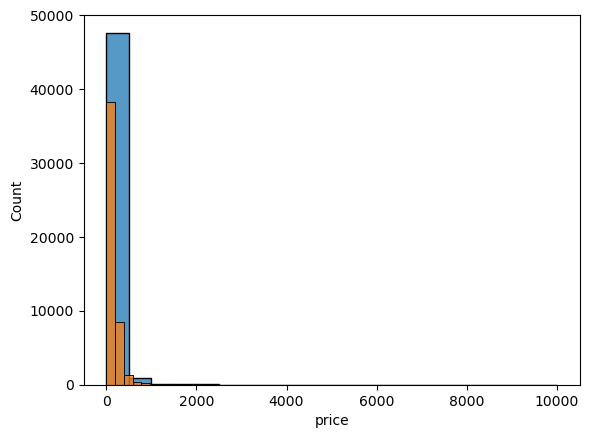

In [8]:
# check the distribution of the price
display(sns.histplot(df.price, bins=20))
display(sns.histplot(df.price[df.price<4000], bins=20))

We can see that the price is not normally distributed. Hence we will need log transformation.

<Axes: xlabel='price', ylabel='Count'>

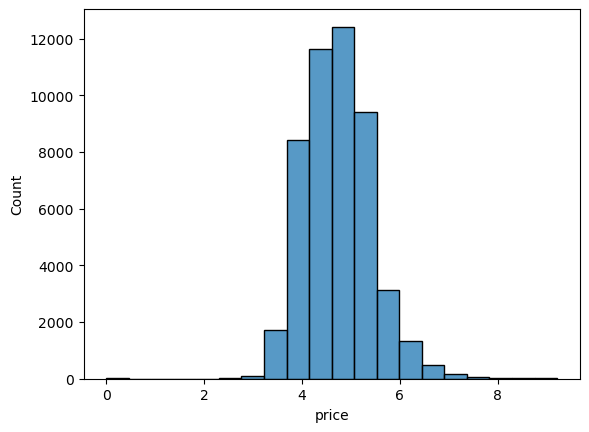

In [9]:
sns.histplot(np.log1p(df.price), bins=20)

In [10]:
# suffling before splitting
np.random.seed(550)
n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)
df_suffled = df.iloc[idx] # iloc is a way to access rows of a dataframe by numbers


# spliting the data
n = len(df)
n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = int(n - (n_val+n_test))
print(f"Total number of samples:{n}\nValidation samples:{n_val}\nTesting samples:{n_test}\nTraining samples:{n_train}")

df_train = df_suffled.iloc[:n_train]
df_val = df_suffled.iloc[n_train:n_train+n_val]
df_test = df_suffled.iloc[n_train+n_val:]

# Extracting the target
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

# Deleting the target
del df_train['price']
del df_val['price']
del df_test['price']

Total number of samples:48895
Validation samples:9779
Testing samples:9779
Training samples:29337


In [11]:
def train_linear_regression(X,y, r=0):
    """
    This model takes the training samples and return the weights of the trained model
    """
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    inv_XTX = np.linalg.inv(XTX)
    w = inv_XTX.dot(X.T).dot(y)
    return w[0], w[1:]

In [12]:
df_train

id                                               name    host_id  \
19782  15840089        kid-_(and_adult-)_friendly_uptown_2-bedroom   99602138   
34296  27214615            4br_4_bath_in_the_heart_of_west_village  200380610   
22663  18341576  spacious_sunlit_1_br_apartment_in_heart_of_harlem    4213096   
1356     594732                greenwich_village_skylit_1br_+deck!    2938302   
27745  21772083                    comfortable_1_bedroom_apartment   26744799   
...         ...                                                ...        ...   
29551  22689135                                  cozy_private_room  167250189   
47097  35596923           3_bedroom_near_subway_&_soho_a+_location  216786331   
442      153405                           greenpoint_spacious_loft     737585   
26037  20778074                                     queit_get_away  148897644   
12348   9530293      private_room_in_sunny_&_spacious_wahi_retreat   21100276   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
19782   yolanda           manhattan  washington_heights  40.83490  -73.94829   
34296   pranjal           manhattan        west_village  40.73495  -74.00033   
22663      jeff           manhattan              harlem  40.80355  -73.94647   
1356      chris           manhattan   greenwich_village  40.73474  -73.99527   
27745     chris            brooklyn          bath_beach  40.60674  -74.00428   
...         ...                 ...                 ...       ...        ...   
29551   kennedy            brooklyn            bushwick  40.69827  -73.93207   
47097      alex           manhattan                soho  40.71891  -74.00024   
442         pat            brooklyn          greenpoint  40.72937  -73.95671   
26037   patrick            brooklyn       crown_heights  40.66790  -73.93976   
12348      cory           manhattan  washington_heights  40.85617  -73.93141   

             room_type  minimum_nights  number_of_reviews last_review  \
19782  entire_home/apt               3                 36  2019-01-01   
34296  entire_home/apt              30                  0         NaN   
22663  entire_home/apt              30                  3  2019-05-09   
1356   entire_home/apt               7                  0         NaN   
27745  entire_home/apt               3                 39  2019-07-01   
...                ...             ...                ...         ...   
29551     private_room               5                  1  2018-01-21   
47097  entire_home/apt               5                  2  2019-07-03   
442    entire_home/apt               2                104  2019-06-16   
26037     private_room               1                  0         NaN   
12348     private_room               4                 70  2019-03-07   

       reviews_per_month  calculated_host_listings_count  availability_365  
19782               1.13                               1                 5  
34296                NaN                              65               364  
22663               0.12                               1               249  
1356                 NaN                               1               189  
27745               2.37                               1               306  
...                  ...                             ...               ...  
29551               0.06                               1                 0  
47097               2.00                               1               152  
442                 1.09                               1                22  
26037                NaN                               1                 0  
12348               1.61                               1                 0  

[29337 rows x 15 columns]

In [13]:
base = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month',
        'calculated_host_listings_count','availability_365'] 

def prepare_X(df):
    """
    Takes the base features and creates the data X
    """
    df_num = df[base]
    df_num = df_num.bfill()
    X= df_num.values
    return X

X_train =prepare_X(df_train)
print(X_train.shape)
w_o, w = train_linear_regression(X_train,y_train)

def validate(X, bias, weight):
    """
    Takes the data, bias, weights, and returns the prediction
    """
    y_pred = bias + X.dot(weight)
    return y_pred

y_pred = validate(X_train, w_o, w)
y_pred

(29337, 7)


array([4.77647237, 5.22931911, 4.88792523, ..., 4.63481168, 4.5282894 ,
       4.69382741])

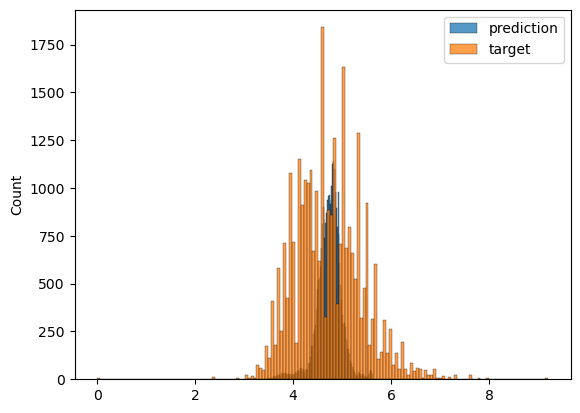

In [14]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train,label='target')

plt.legend()

In [15]:
# Creating the error metric

def rmse(y_pred,y_act):
    """Takes the prediction (y_pred) and the actual and returns the rmse"""
    error = y_pred-y_act
    error = error**2
    mse = np.mean(error)
    return np.sqrt(mse)

# Validation the training on the training data
rmse(y_pred,y_train)

0.6536411783752414

In [16]:
# Validating on the validation data
X_val =prepare_X(df_val)

y_pred = validate(X_val, w_o, w)
y_pred
rmse(y_pred, y_val)

0.6349250131221112

In [17]:
# Validating on three test samples
list_of_dict = [dict(df_test.iloc[0]),dict(df_test.iloc[1]), dict(df_test.iloc[2])]
df_test_sm = pd.DataFrame(data=list_of_dict)

X_test = prepare_X(df_test_sm)

y_pred = validate(X_test, w_o, w)
suggestion = np.expm1(y_pred)
suggestion


array([114.96422408, 120.48433886, 105.69140053])

In [18]:
np.expm1(y_test)

array([145., 190., 125., ...,  60., 200.,  85.])

This model can be improved by adding more features. 

In [19]:
def prepare_X(df, list_of_features=None):
    """
    Takes the base features, list of categorical features, and creates the data X
    
    """
    df = df.copy()
    features = base.copy()
    
    if list_of_features:
        
        for col in list_of_features:
            unique_features = df[col].unique()
#             print(feature,unique_features)
            for feature in unique_features:
                feature = f'is_{feature}'
                values = (df[col] == feature).astype(int)
                df[feature] = values
                features.append(feature)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X= df_num.values
    return X

In [20]:
list_of_features = ['room_type','neighbourhood_group','neighbourhood_group']
list_of_features = 0
X_train = prepare_X(df_train, list_of_features=list_of_features)
print(X_train.shape)
w_o, w = train_linear_regression(X_train,y_train, r= 0)
y_pred = validate(X_train, w_o, w)
rmse(y_pred, y_train)
y_pred

(29337, 7)


array([4.77859346, 5.23671685, 4.89510398, ..., 4.65281568, 4.53117465,
       4.69830783])

In [21]:
# Validation on the validation data
X_val = prepare_X(df_val, list_of_features=list_of_features)
y_pred = validate(X_val, w_o, w)
rmse(np.expm1(y_pred),np.expm1(y_val))

230.93546652231578

Adding the hostname results in singular matrix problem

In [22]:
X_test = prepare_X(df_test,list_of_features=list_of_features)
print(X_test.shape)

y_pred = validate(X_test, w_o, w)
print(y_pred)
suggestion = np.expm1(y_pred)
rmse(suggestion,np.expm1(y_test))

(9779, 7)
[4.75641474 4.7992007  4.67704603 ... 4.66048386 4.67527459 4.9571756 ]


212.54489646782594

In [23]:
np.expm1(y_test).mean()

151.89702423560692